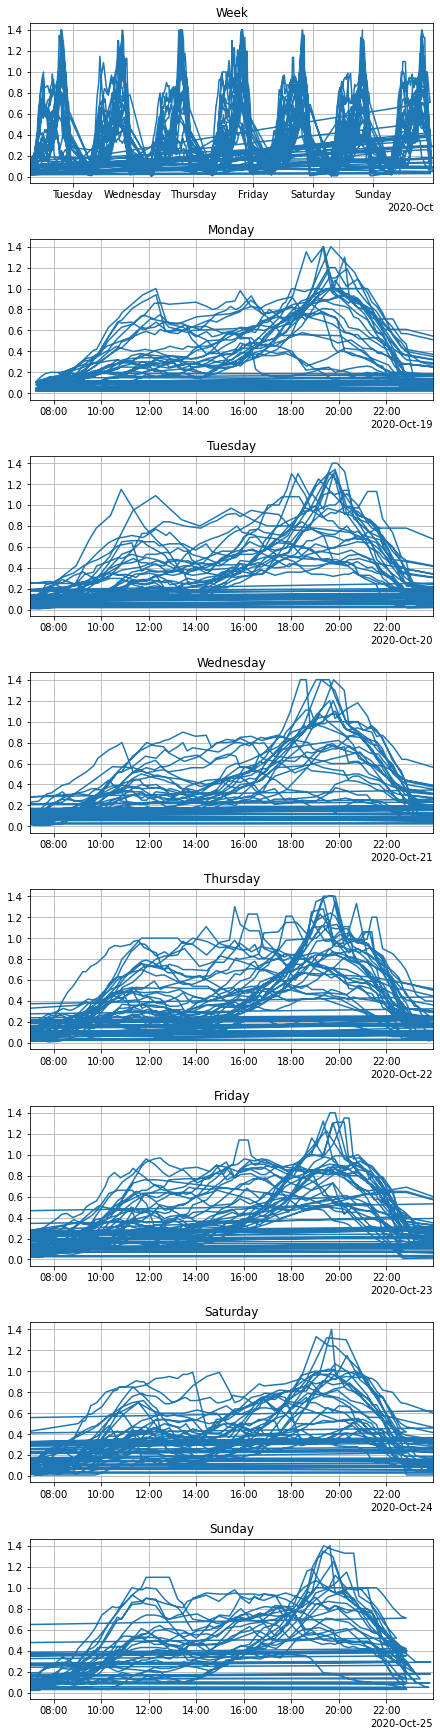

In [6]:
import matplotlib.pyplot as plt
import csv
from dateutil import parser
import matplotlib.dates as mdates
import numpy as np
import datetime

x = []
y = []

lims = [(np.datetime64('2020-10-19 07:00'), np.datetime64('2020-10-25 23:59')),
        (np.datetime64('2020-10-19 07:00'), np.datetime64('2020-10-19 23:59')),
        (np.datetime64('2020-10-20 07:00'), np.datetime64('2020-10-20 23:59')),
        (np.datetime64('2020-10-21 07:00'), np.datetime64('2020-10-21 23:59')),
        (np.datetime64('2020-10-22 07:00'), np.datetime64('2020-10-22 23:59')),
        (np.datetime64('2020-10-23 07:00'), np.datetime64('2020-10-23 23:59')),
        (np.datetime64('2020-10-24 07:00'), np.datetime64('2020-10-24 23:59')),
        (np.datetime64('2020-10-25 07:00'), np.datetime64('2020-10-25 23:59')),
]

titles = [
    "Week",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]

with open('stats/total.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(plots)
    for row in plots:
        date = parser.parse(row[0])
        if (float(row[1]) > 0):
            x.append(parser.parse("2020-10-%d %d:%d:00" % (((date.day - 19) % 7) + 19, date.hour, date.minute))),
            y.append(float(row[1]) + float(row[2])/100)
        
fig, axs = plt.subplots(len(lims), 1, constrained_layout=True, figsize=(6, 24))
for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator, show_offset=False, formats=['%Y', '%A', '%A', '%H:%M', '%H:%M', '%S.%f'])
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.set_xlim(lims[nn])
    ax.grid(True)
    ax.set_title(titles[nn])
    ax.plot(x, y)

plt.show()